Voltage and Current Divider
===========================

This circuit is a fundamental block in electronic that permits to scale
a voltage by an impedance ratio:


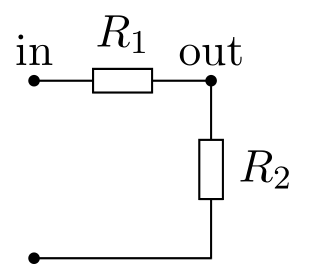

The relation between the input and ouput voltage is:

$$\frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$

This equation holds for any impedances like resistance, capacitance,
inductance, etc.


In [16]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Voltage Divider')

circuit.V('input', 1, circuit.gnd, 20@u_V)
circuit.R(1, 1, 2, 2@u_kΩ)
circuit.R(2, 2, circuit.gnd, 2@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print('Node {}: {:5.2f} V'.format(str(node), float(node))) # Fixme: format value + unit

print(circuit)


Node 2: 10.00 V
Node 1: 20.00 V
.title Voltage Divider
Vinput 1 0 20V
R1 1 2 2kOhm
R2 2 0 2kOhm



Similarly we can build a circuit that scale a current by an impedance
ratio:


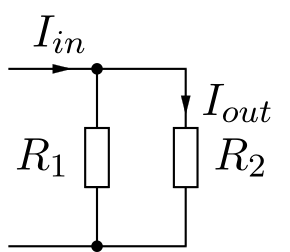

The relation between the input and ouput current is:

$$\frac{I_{out}}{I_{in}} = \frac{R_1}{R_1 + R_2}$$

Note the role of R1 and R2 is exchanged.

This equation holds for any impedances like resistance, capacitance,
inductance, etc.


In [21]:
circuit = Circuit('Current Divider')

circuit.I('input', 1, circuit.gnd, 1@u_A) # Fixme: current value
circuit.R(1, 1, circuit.gnd, 2@u_kΩ)
circuit.R(2, 1, circuit.gnd, 1@u_kΩ)

print(circuit)

for resistance in (circuit.R1, circuit.R2):
    resistance.minus.add_current_probe(circuit) # to get positive value

print(circuit)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# Fixme: current over resistor
for node in analysis.branches.values():
    print('Node {}: {:5.2f} A'.format(str(node), float(node))) # Fixme: format value + unit




.title Current Divider
Iinput 1 0 1A
R1 1 0 2kOhm
R2 1 0 1kOhm

.title Current Divider
Iinput 1 0 1A
R1 1 R1_minus 2kOhm
R2 1 R2_minus 1kOhm
VR1_minus 0 R1_minus 0
VR2_minus 0 R2_minus 0

Node vr1_minus:  0.00 A
Node vr2_minus:  0.00 A
